<a href="https://colab.research.google.com/github/DariiaKhoroshchuk/deep_learning_labs/blob/master/Lab2_Dariia_Khoroshchuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd /content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2

In [ ]:
!unzip -u "/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/test.csv.zip" -d "/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/reports/Khoroshchuk-12/test.csv"

Archive:  /content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/test.csv.zip
  inflating: /content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/reports/Khoroshchuk-12/test.csv/__MACOSX/._test.csv  
  inflating: /content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/reports/Khoroshchuk-12/test.csv/test.csv  


In [ ]:
!unzip -u "/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/train.csv.zip" -d "/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/reports/Khoroshchuk-12/train.csv"

Archive:  /content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/train.csv.zip
  inflating: /content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/reports/Khoroshchuk-12/train.csv/train.csv  


In [ ]:
!ls /content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/reports/Khoroshchuk-12/

test.csv  train.csv


**Task 1.1**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D
from keras.optimizers import RMSprop,Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [ ]:
# load train dataset
train = pd.read_csv("/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/reports/Khoroshchuk-12/train.csv/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# load test dataset
test= pd.read_csv("/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab2/reports/Khoroshchuk-12/test.csv/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

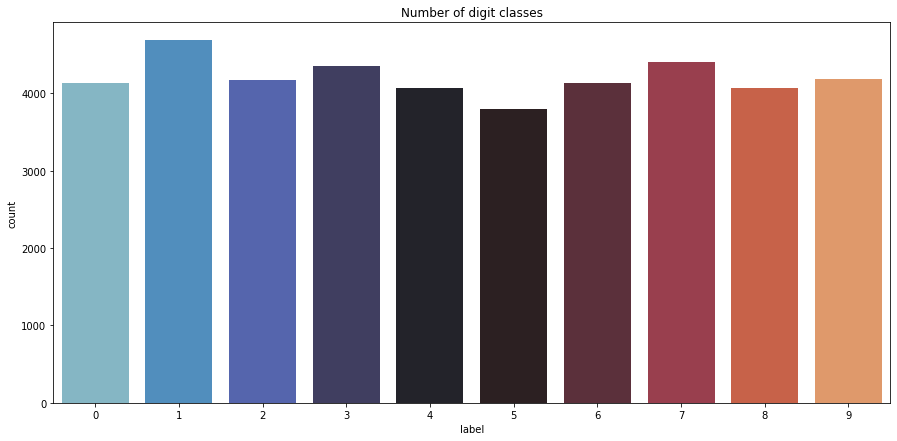

In [ ]:
# put labels into y_train variable
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"], axis = 1)

# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

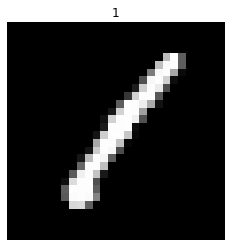

In [ ]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

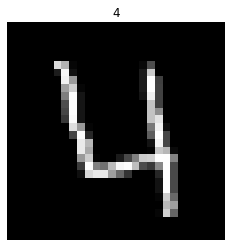

In [ ]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

**Нормалізація (Normalization)**

Ми виконуємо нормалізацію градацій сірого, щоб зменшити ефект різниці
освітленості. Якщо ми виконуємо нормалізацію CNN буде працювати швидше.
Під нормалізацією розуміється приведення значень матриці зображень в діапазон від 0 до 1. Оскільки в нас Зображення в градаціях сірого ми маємо діапазон від 0 до 255.

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


**Трансформація в тензори (Reshape)**

Для опрацювання зображень в глибоких конволюційних мережах використовуються
операції конволюції і пулінга, які вимагають перетворення векторів / матриць в тензори.
Таким чином тренувальні та тестові зображення, які мають розмірність (28 x 28) мають бути перетворені в тензори розмірністю 28x28x1 (3D matrices)

Третя розмірність відповідає каналам зображень. Наші зображення мають масштаб сірого, тому вони використовують лише один канал.

In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


**Формування векторів виходів (Label Encoding)**

Для формування векторів виходів використаємо one-hot кодування яке є утілітою
в keras, наприклад
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]

In [ ]:
# Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)
print(Y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


**Розбиття на train, val**

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


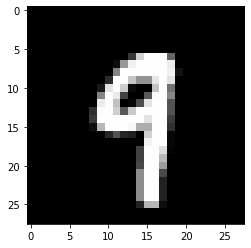

In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
featurewise_center=False, # set input mean to 0 over the dataset
samplewise_center=False, # set each sample mean to 0
featurewise_std_normalization=False, # divide inputs by std of the dataset
samplewise_std_normalization=False, # divide each input by its std
zca_whitening=False, # dimesion reduction
rotation_range=5, # randomly rotate images in the range 5 degrees
zoom_range = 0.2, # Randomly zoom image 5%
width_shift_range=0.2, # randomly shift images horizontally 5%
height_shift_range=0.2, # randomly shift images vertically 5%
horizontal_flip=False, # randomly flip images
vertical_flip=False) # randomly flip images
datagen.fit(X_train)

In [ ]:
def model_1(optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999), kernel_size = [(5,5), (3, 3)]):
  
  model = Sequential()

  model.add(Conv2D(filters = 8, kernel_size = kernel_size[0], padding = 'Same',
                   activation ='relu', input_shape = (28,28,1)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 16, kernel_size = kernel_size[1], padding = 'Same',
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))

  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = "softmax"))

  # Compile the model
  model.compile(optimizer = optimizer , loss = "categorical_crossentropy", 
                metrics=["accuracy"])
  
  return model

In [ ]:
def results_visualization(history):
  fig = plt.figure(figsize=(15, 5))
  ax1= fig.add_subplot(1,2,1)
  ax2= fig.add_subplot(1,2,2)

  ax1.plot(history.history['val_loss'], color='b', label="validation loss")
  ax1.plot(history.history['loss'], color='g', label="loss")
  ax1.set_title("Loss")

  ax1.set_xlabel("Number of Epochs")
  ax1.set_ylabel("Loss")
  ax1.legend()

  ax2.plot(history.history['val_accuracy'], color='b', label="validation accuracy")
  ax2.plot(history.history['accuracy'], color='g', label="accuracy")
  ax2.set_title("Accuracy")

  ax2.set_xlabel("Number of Epochs")
  ax2.set_ylabel("Accuracy")
  ax2.legend()
  plt.show()

In [ ]:
model = model_1()

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 250

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
151/151 [==============================] - 32s 203ms/step - loss: 1.5860 - accuracy: 0.4470 - val_loss: 0.4560 - val_accuracy: 0.8919
Epoch 2/100
151/151 [==============================] - 30s 196ms/step - loss: 0.7295 - accuracy: 0.7670 - val_loss: 0.2563 - val_accuracy: 0.9338
Epoch 3/100
151/151 [==============================] - 28s 187ms/step - loss: 0.5541 - accuracy: 0.8239 - val_loss: 0.1989 - val_accuracy: 0.9483
Epoch 4/100
151/151 [==============================] - 32s 214ms/step - loss: 0.4686 - accuracy: 0.8522 - val_loss: 0.1623 - val_accuracy: 0.9557
Epoch 5/100
151/151 [==============================] - 30s 200ms/step - loss: 0.4164 - accuracy: 0.8713 - val_loss: 0.1451 - val_accuracy: 0.9619
Epoch 6/100
151/151 [==============================] - 30s 200ms/step - loss: 0.3850 - accuracy: 0.8798 - val_loss: 0.1299 - val_accuracy: 0.9652
Epoch 7/100
151/151 [==============================] - 28s 183ms/step - loss: 0.3518 - accuracy: 0.8924 - val_loss: 0.1129 -

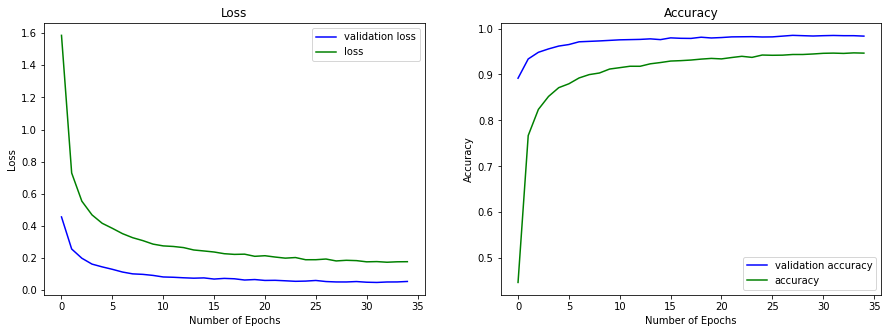

In [ ]:
results_visualization(history)

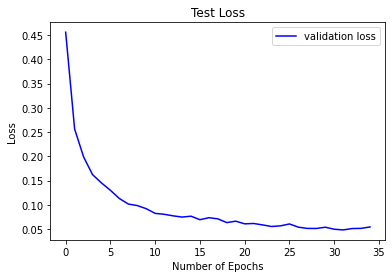

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")

plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

132/132 [==============================] - 1s 8ms/step


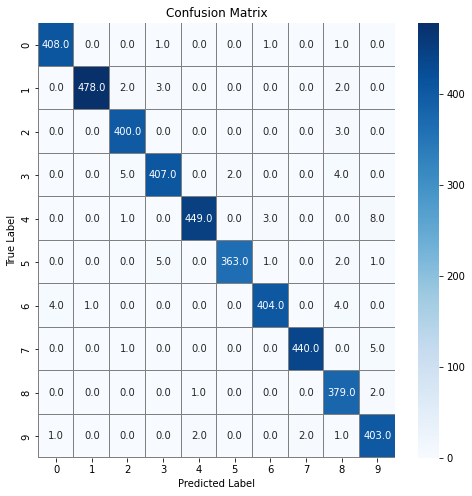

In [ ]:
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True,
linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Task 1.2**

In [ ]:
model_2 = model_1(optimizer = SGD(learning_rate = 0.01, momentum = 0.8))

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 250

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model_2.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
151/151 [==============================] - 33s 215ms/step - loss: 2.2917 - accuracy: 0.1277 - val_loss: 2.2268 - val_accuracy: 0.3310
Epoch 2/100
151/151 [==============================] - 35s 229ms/step - loss: 2.1525 - accuracy: 0.2346 - val_loss: 1.5615 - val_accuracy: 0.6879
Epoch 3/100
151/151 [==============================] - 35s 228ms/step - loss: 1.6992 - accuracy: 0.4036 - val_loss: 0.8552 - val_accuracy: 0.8152
Epoch 4/100
151/151 [==============================] - 34s 223ms/step - loss: 1.3151 - accuracy: 0.5485 - val_loss: 0.6505 - val_accuracy: 0.8474
Epoch 5/100
151/151 [==============================] - 35s 229ms/step - loss: 1.0596 - accuracy: 0.6453 - val_loss: 0.4961 - val_accuracy: 0.8838
Epoch 6/100
151/151 [==============================] - 34s 227ms/step - loss: 0.8961 - accuracy: 0.7035 - val_loss: 0.4297 - val_accuracy: 0.9014
Epoch 7/100
151/151 [==============================] - 34s 227ms/step - loss: 0.7963 - accuracy: 0.7411 - val_loss: 0.3548 -

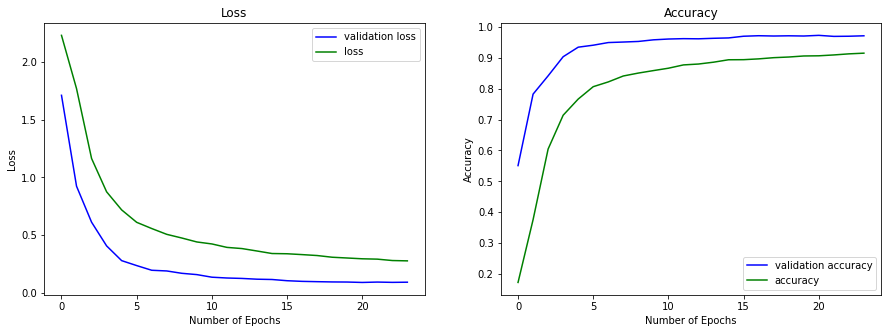

In [ ]:
results_visualization(history)

**Task 1.3**

In [ ]:
model_3 = model_1(kernel_size=[(5, 7), (2, 4)])

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 250

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model_3.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
151/151 [==============================] - 37s 243ms/step - loss: 1.5605 - accuracy: 0.4552 - val_loss: 0.4359 - val_accuracy: 0.9014
Epoch 2/100
151/151 [==============================] - 36s 239ms/step - loss: 0.6886 - accuracy: 0.7773 - val_loss: 0.2557 - val_accuracy: 0.9381
Epoch 3/100
151/151 [==============================] - 38s 249ms/step - loss: 0.5204 - accuracy: 0.8382 - val_loss: 0.1982 - val_accuracy: 0.9479
Epoch 4/100
151/151 [==============================] - 38s 251ms/step - loss: 0.4381 - accuracy: 0.8608 - val_loss: 0.1535 - val_accuracy: 0.9574
Epoch 5/100
151/151 [==============================] - 38s 252ms/step - loss: 0.3915 - accuracy: 0.8792 - val_loss: 0.1320 - val_accuracy: 0.9631
Epoch 6/100
151/151 [==============================] - 36s 240ms/step - loss: 0.3624 - accuracy: 0.8874 - val_loss: 0.1173 - val_accuracy: 0.9681
Epoch 7/100
151/151 [==============================] - 40s 262ms/step - loss: 0.3352 - accuracy: 0.8959 - val_loss: 0.1007 -

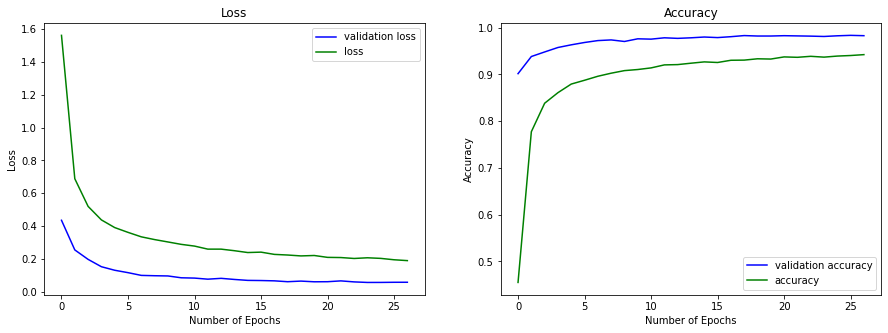

In [ ]:
results_visualization(history)

In [ ]:
model_4 = model_1(kernel_size=[(7, 5), (4, 2)])

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 250

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model_4.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
151/151 [==============================] - 37s 241ms/step - loss: 0.9734 - accuracy: 0.6723 - val_loss: 0.2139 - val_accuracy: 0.9464
Epoch 2/100
151/151 [==============================] - 47s 311ms/step - loss: 0.4641 - accuracy: 0.8522 - val_loss: 0.1422 - val_accuracy: 0.9626
Epoch 3/100
151/151 [==============================] - 40s 263ms/step - loss: 0.3924 - accuracy: 0.8775 - val_loss: 0.1407 - val_accuracy: 0.9610
Epoch 4/100
151/151 [==============================] - 37s 242ms/step - loss: 0.3568 - accuracy: 0.8899 - val_loss: 0.1218 - val_accuracy: 0.9636
Epoch 5/100
151/151 [==============================] - 36s 241ms/step - loss: 0.3284 - accuracy: 0.8987 - val_loss: 0.1002 - val_accuracy: 0.9719
Epoch 6/100
151/151 [==============================] - 42s 279ms/step - loss: 0.3068 - accuracy: 0.9060 - val_loss: 0.1048 - val_accuracy: 0.9712
Epoch 7/100
151/151 [==============================] - 40s 266ms/step - loss: 0.2979 - accuracy: 0.9092 - val_loss: 0.0971 -

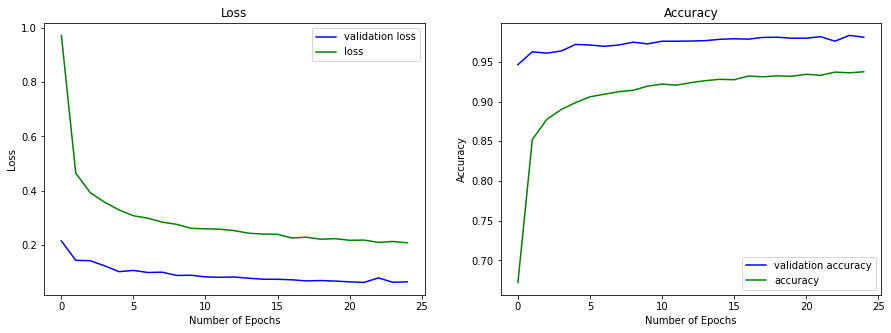

In [ ]:
results_visualization(history)

In [ ]:
model_5 = model_1(kernel_size=[(7, 5), (2, 2)])

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 250

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model_5.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
151/151 [==============================] - 38s 245ms/step - loss: 1.0240 - accuracy: 0.6559 - val_loss: 0.2625 - val_accuracy: 0.9333
Epoch 2/100
151/151 [==============================] - 35s 230ms/step - loss: 0.5290 - accuracy: 0.8317 - val_loss: 0.2050 - val_accuracy: 0.9471
Epoch 3/100
151/151 [==============================] - 37s 248ms/step - loss: 0.4301 - accuracy: 0.8657 - val_loss: 0.1565 - val_accuracy: 0.9574
Epoch 4/100
151/151 [==============================] - 37s 246ms/step - loss: 0.3908 - accuracy: 0.8804 - val_loss: 0.1413 - val_accuracy: 0.9621
Epoch 5/100
151/151 [==============================] - 39s 259ms/step - loss: 0.3686 - accuracy: 0.8821 - val_loss: 0.1244 - val_accuracy: 0.9643
Epoch 6/100
151/151 [==============================] - 43s 286ms/step - loss: 0.3468 - accuracy: 0.8905 - val_loss: 0.1148 - val_accuracy: 0.9686
Epoch 7/100
151/151 [==============================] - 37s 247ms/step - loss: 0.3225 - accuracy: 0.9000 - val_loss: 0.1023 -

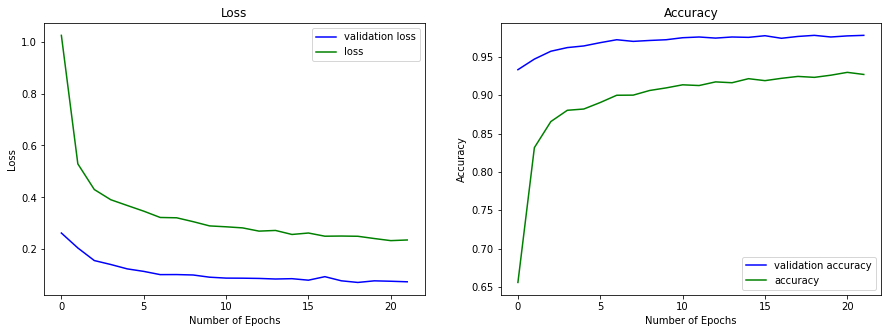

In [ ]:
results_visualization(history)

**Task 1.4**

In [ ]:
def model_new1(optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)):
  
  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'Same',
                   activation ='relu', input_shape = (28,28,1)))
  model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'Same',
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 32, kernel_size = 5, padding = 'Same',
                   activation ='relu'))
  model.add(Conv2D(filters = 32, kernel_size = 5, padding = 'Same',
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'Same',
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))

  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = "softmax"))

  # Compile the model
  model.compile(optimizer = optimizer , loss = "categorical_crossentropy", 
                metrics=["accuracy"])
  
  return model

In [ ]:
model_11_1 = model_new1()

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 64

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model_11_1.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
590/590 [==============================] - 23s 24ms/step - loss: 0.7143 - accuracy: 0.7578 - val_loss: 0.0842 - val_accuracy: 0.9750
Epoch 2/100
590/590 [==============================] - 15s 26ms/step - loss: 0.1773 - accuracy: 0.9497 - val_loss: 0.0609 - val_accuracy: 0.9831
Epoch 3/100
590/590 [==============================] - 15s 26ms/step - loss: 0.1279 - accuracy: 0.9637 - val_loss: 0.0412 - val_accuracy: 0.9886
Epoch 4/100
590/590 [==============================] - 14s 24ms/step - loss: 0.1007 - accuracy: 0.9704 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 5/100
590/590 [==============================] - 14s 24ms/step - loss: 0.0927 - accuracy: 0.9737 - val_loss: 0.0363 - val_accuracy: 0.9905
Epoch 6/100
590/590 [==============================] - 14s 24ms/step - loss: 0.0824 - accuracy: 0.9759 - val_loss: 0.0248 - val_accuracy: 0.9914
Epoch 7/100
590/590 [==============================] - 14s 23ms/step - loss: 0.0761 - accuracy: 0.9786 - val_loss: 0.0440 - val_ac

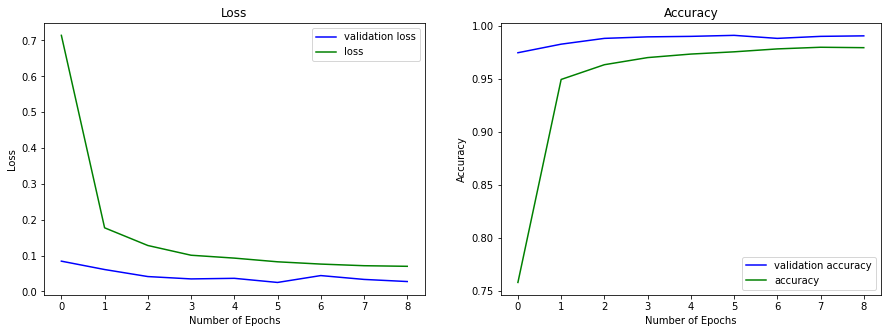

In [ ]:
results_visualization(history)

In [ ]:
def model_new2(optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)):
  
  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'Same',
                   activation ='relu', input_shape = (28,28,1)))
  model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'Same',
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 32, kernel_size = 5, padding = 'Same',
                   activation ='relu'))
  model.add(Conv2D(filters = 32, kernel_size = 5, padding = 'Same',
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'Same',
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))

  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = "softmax"))

  # Compile the model
  model.compile(optimizer = optimizer , loss = "categorical_crossentropy", 
                metrics=["accuracy"])
  
  return model

In [ ]:
model_11_2 = model_new2()

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 64

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model_11_2.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
590/590 [==============================] - 17s 28ms/step - loss: 0.5839 - accuracy: 0.8068 - val_loss: 0.0751 - val_accuracy: 0.9740
Epoch 2/100
590/590 [==============================] - 14s 24ms/step - loss: 0.1526 - accuracy: 0.9564 - val_loss: 0.0475 - val_accuracy: 0.9829
Epoch 3/100
590/590 [==============================] - 14s 23ms/step - loss: 0.0998 - accuracy: 0.9720 - val_loss: 0.0471 - val_accuracy: 0.9860
Epoch 4/100
590/590 [==============================] - 14s 23ms/step - loss: 0.0817 - accuracy: 0.9774 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 5/100
590/590 [==============================] - 15s 25ms/step - loss: 0.0708 - accuracy: 0.9794 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 6/100
590/590 [==============================] - 15s 25ms/step - loss: 0.0644 - accuracy: 0.9824 - val_loss: 0.0354 - val_accuracy: 0.9910
Epoch 7/100
590/590 [==============================] - 14s 24ms/step - loss: 0.0571 - accuracy: 0.9838 - val_loss: 0.0247 - val_ac

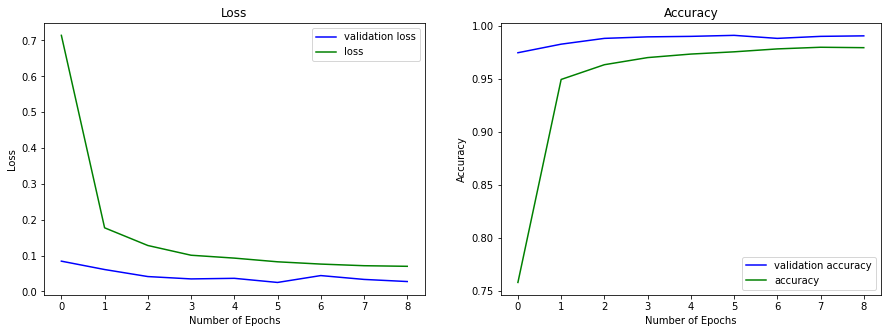

In [ ]:
results_visualization(history)

**Task 1.5**

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=15,  
        zoom_range = 0.3, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)

datagen.fit(X_train)

In [ ]:
model_6 = model_1()

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 250

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model_6.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
151/151 [==============================] - 11s 74ms/step - loss: 0.8630 - accuracy: 0.7198 - val_loss: 0.1832 - val_accuracy: 0.9507
Epoch 2/100
151/151 [==============================] - 13s 87ms/step - loss: 0.5165 - accuracy: 0.8378 - val_loss: 0.1337 - val_accuracy: 0.9605
Epoch 3/100
151/151 [==============================] - 12s 81ms/step - loss: 0.4029 - accuracy: 0.8731 - val_loss: 0.1023 - val_accuracy: 0.9683
Epoch 4/100
151/151 [==============================] - 13s 88ms/step - loss: 0.3529 - accuracy: 0.8907 - val_loss: 0.0917 - val_accuracy: 0.9736
Epoch 5/100
151/151 [==============================] - 11s 70ms/step - loss: 0.3175 - accuracy: 0.9023 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 6/100
151/151 [==============================] - 11s 72ms/step - loss: 0.2946 - accuracy: 0.9100 - val_loss: 0.0768 - val_accuracy: 0.9795
Epoch 7/100
151/151 [==============================] - 11s 72ms/step - loss: 0.2780 - accuracy: 0.9130 - val_loss: 0.0666 - val_ac

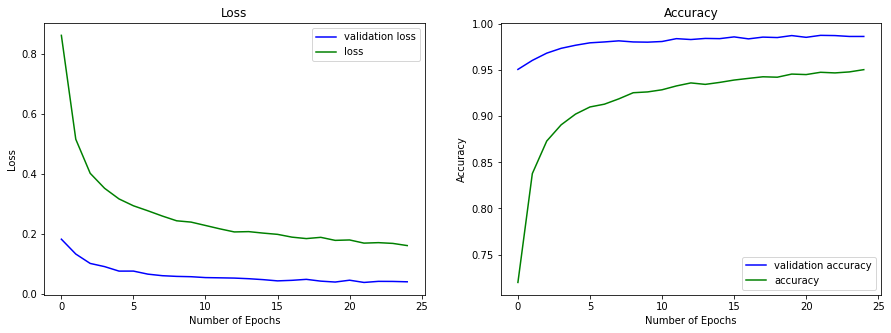

In [ ]:
results_visualization(history)

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=8,  
        zoom_range = 0.1,
        width_shift_range=0.01,  
        height_shift_range=0.01,  
        horizontal_flip=False,  
        vertical_flip=False)

datagen.fit(X_train)

In [ ]:
model_7 = model_1()

In [ ]:
epochs = 100 # for better result increase the epochs
batch_size = 250

early_stopping = EarlyStopping(verbose=1, patience=3)

In [ ]:
# Fit the model
history = model_7.fit_generator(datagen.flow(X_train,Y_train, 
                                           batch_size=batch_size), 
                              epochs = epochs, 
                              callbacks = [early_stopping],
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
151/151 [==============================] - 25s 83ms/step - loss: 0.4120 - accuracy: 0.8676 - val_loss: 0.0943 - val_accuracy: 0.9707
Epoch 2/100
151/151 [==============================] - 11s 71ms/step - loss: 0.1636 - accuracy: 0.9493 - val_loss: 0.0712 - val_accuracy: 0.9793
Epoch 3/100
151/151 [==============================] - 14s 90ms/step - loss: 0.1329 - accuracy: 0.9590 - val_loss: 0.0578 - val_accuracy: 0.9819
Epoch 4/100
151/151 [==============================] - 11s 70ms/step - loss: 0.1139 - accuracy: 0.9649 - val_loss: 0.0535 - val_accuracy: 0.9840
Epoch 5/100
151/151 [==============================] - 11s 71ms/step - loss: 0.1054 - accuracy: 0.9655 - val_loss: 0.0474 - val_accuracy: 0.9845
Epoch 6/100
151/151 [==============================] - 10s 68ms/step - loss: 0.0976 - accuracy: 0.9697 - val_loss: 0.0434 - val_accuracy: 0.9864
Epoch 7/100
151/151 [==============================] - 11s 73ms/step - loss: 0.0968 - accuracy: 0.9700 - val_loss: 0.0409 - val_ac

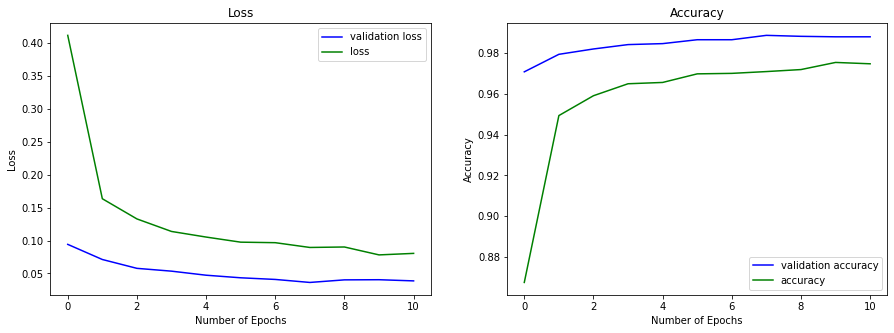

In [ ]:
results_visualization(history)

**Task 2.1**

In [ ]:
def LetNet_5():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same',
    activation='relu', input_shape=(28, 28, 1)))
    model.add(AveragePooling2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid',
    activation='relu'))
    model.add(AveragePooling2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.build()
    model.summary()
    
    adam = Adam(lr=5e-4)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
    optimizer=adam)
    
    return model

In [ ]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              patience=3,
                              verbose=1,
                              factor=0.2,
                              min_lr=1e-6)
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1)
datagen.fit(X_train)

In [ ]:
model = LetNet_5()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_51 (Conv2D)          (None, 10, 10, 48)        38448     
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 48)         0         
 ePooling2D)                                                     
                                                                 
 flatten_11 (Flatten)        (None, 1200)              0         
                                                                 
 dense_23 (Dense)            (None, 256)             

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=100),
steps_per_epoch=len(X_train)/100, epochs=30, validation_data=(X_val,Y_val),
callbacks=[reduce_lr])

Epoch 1/30
378/378 [==============================] - 13s 32ms/step - loss: 0.5817 - accuracy: 0.8165 - val_loss: 0.1464 - val_accuracy: 0.9600 - lr: 5.0000e-04
Epoch 2/30
378/378 [==============================] - 12s 32ms/step - loss: 0.1778 - accuracy: 0.9469 - val_loss: 0.1175 - val_accuracy: 0.9664 - lr: 5.0000e-04
Epoch 3/30
378/378 [==============================] - 12s 33ms/step - loss: 0.1393 - accuracy: 0.9576 - val_loss: 0.0791 - val_accuracy: 0.9748 - lr: 5.0000e-04
Epoch 4/30
378/378 [==============================] - 12s 31ms/step - loss: 0.1123 - accuracy: 0.9660 - val_loss: 0.0870 - val_accuracy: 0.9748 - lr: 5.0000e-04
Epoch 5/30
378/378 [==============================] - 13s 34ms/step - loss: 0.0940 - accuracy: 0.9710 - val_loss: 0.0731 - val_accuracy: 0.9776 - lr: 5.0000e-04
Epoch 6/30
378/378 [==============================] - 12s 31ms/step - loss: 0.0861 - accuracy: 0.9747 - val_loss: 0.0568 - val_accuracy: 0.9829 - lr: 5.0000e-04
Epoch 7/30
378/378 [==============

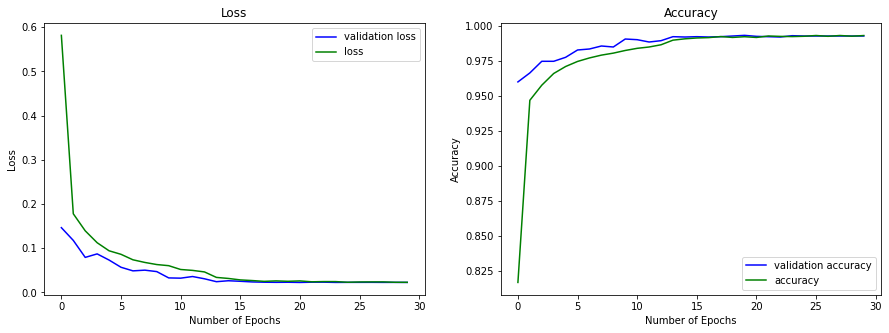

In [ ]:
results_visualization(history)

In [ ]:
score = model.evaluate(X_val,Y_val, batch_size=32)
score

132/132 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9936


[0.02235940843820572, 0.993571400642395]